###그래프 연산

In [ ]:
class add_graph: #더하기 그래프
    def __init__(self):
        pass
    def forward(self, x, y):
        out = x + y
        return out
    def backword(self, dout):
        dx = 1 * dout
        dy = 1 * dout
        return dx, dy

In [ ]:
class mul_graph: #곱하기 그래프
    def __init__(self):
        self.x = None
        self.y = None
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        return out
    def backword(self, dout):
        dx = self.y * dout
        dy = self.x * dout
        return dx, dy

In [ ]:
class mse_graph:
    def __init__(self):
        self.loss = None
        self.y= None
        self.t = None
        self.x= None
    def forward(self,y,t):
        self.t = t
        self.y = y
        self.loss=np.square(self.t-self.y).sum()/self.t.shape[0]
        return self.loss
    def backward(self,x,dout=1):
        data_size = self.t.shape[0]
        dweight_mse = (((self.y-self.t)*x).sum()*2 / data_size)
        dbias_mse = (self.y-self.t).sum()*2 / data_size
        return dweight_mse,dbias_mse

In [ ]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

In [ ]:
mul_apple_graph = mul_graph()
mul_orange_graph = mul_graph()
add_apple_orange_graph = add_graph()
mul_tax_graph = mul_graph()

In [ ]:
apple_price = mul_apple_graph.forward(apple,apple_num) #사과 값
orange_price =mul_orange_graph.forward(orange,orange_num) #오렌지 값
all_price = add_apple_orange_graph.forward(apple_price,orange_price) #합친 값
total_price = mul_tax_graph.forward(all_price, tax) #세금후 값
print(total_price) #소수점 오류

715.0000000000001


In [ ]:
dprice = 1
dall_price, dtax =mul_tax_graph.backword(dprice)
dapple_price, dorange_price = add_apple_orange_graph.backword(dall_price)
dorange, dorange_num = mul_orange_graph.backword(dorange_price)
dapple,dapple_num = mul_apple_graph.backword(dapple_price)
print('dApple',dapple)
print('dApple_num',dapple_num)
print('dOrange',dorange)
print('dOrange_num',dorange_num)

dApple 2.2
dApple_num 110.00000000000001
dOrange 3.3000000000000003
dOrange_num 165.0


In [ ]:
import numpy as np

In [ ]:
def celcius_to_fahrenheit(x):
    return x * 1.8 + 32

In [ ]:
weight = np.random.uniform(0,5,1)
print(weight)
bias = 0

[4.03101951]


In [ ]:
data_C = np.arange(0, 100)
data_F = celcius_to_fahrenheit(data_C)
scaled_data_C = data_C / 100
scaled_data_F = data_F / 100
print(scaled_data_C)
print(scaled_data_F)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
[0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.724 1.742 1.76 

In [ ]:
weight_graph = mul_graph()
bias_graph = add_graph()

In [ ]:
weight_data = weight_graph.forward(weight,scaled_data_C)
predict_data = bias_graph.forward(weight_data, bias)
print(predict_data)

[0.         0.0403102  0.08062039 0.12093059 0.16124078 0.20155098
 0.24186117 0.28217137 0.32248156 0.36279176 0.40310195 0.44341215
 0.48372234 0.52403254 0.56434273 0.60465293 0.64496312 0.68527332
 0.72558351 0.76589371 0.8062039  0.8465141  0.88682429 0.92713449
 0.96744468 1.00775488 1.04806507 1.08837527 1.12868546 1.16899566
 1.20930585 1.24961605 1.28992624 1.33023644 1.37054663 1.41085683
 1.45116702 1.49147722 1.53178741 1.57209761 1.6124078  1.652718
 1.69302819 1.73333839 1.77364858 1.81395878 1.85426897 1.89457917
 1.93488936 1.97519956 2.01550975 2.05581995 2.09613014 2.13644034
 2.17675053 2.21706073 2.25737092 2.29768112 2.33799131 2.37830151
 2.41861171 2.4589219  2.4992321  2.53954229 2.57985249 2.62016268
 2.66047288 2.70078307 2.74109327 2.78140346 2.82171366 2.86202385
 2.90233405 2.94264424 2.98295444 3.02326463 3.06357483 3.10388502
 3.14419522 3.18450541 3.22481561 3.2651258  3.305436   3.34574619
 3.38605639 3.42636658 3.46667678 3.50698697 3.54729717 3.587607

In [ ]:
dout = 1
dbias, dweighted_data = bias_graph.backword(dout) #미분
dweight, dscalsd_data_C = weight_graph.backword(dweighted_data) #미분
print(dbias)
print(dweight)

1
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


In [ ]:
mseGraph = mse_graph()
mse = mseGraph.forward(predict_data,scaled_data_F) #편차
print(mse)

1.029958086145609


In [ ]:
weight_mse_gradient, bias_mse_gradient = mseGraph.backward(scaled_data_C) #미분
print(weight_mse_gradient)
print(bias_mse_gradient)

1.1483105112919774
1.5687093135054937


In [ ]:
learning_rate = 0.1
learned_weight = weight - \
learning_rate * weight_mse_gradient *np.average(dweight)
print('befor learning weight :',weight)
print('after learning weight :',learned_weight)

befor learning weight : [4.03101951]
after learning weight : [3.97417814]


In [ ]:
learned_bias = bias - learning_rate * bias_mse_gradient *dbias
print('before learning bias :',bias)
print('after leaning bias   :',learned_bias)

before learning bias : 0
after leaning bias   : -0.1568709313505494


In [ ]:
error_list= []
weight_list = []
bias_list = []
for i in range(1000):
    #forward
    weighted_data= weight_graph.forward(
        weight, scaled_data_C)
    predict_data = bias_graph.forward(
        weighted_data,bias)
    #backword
    dout=1
    dbias, dweighted_data = bias_graph.backword(dout)
    dweight, dscaled_data_C =weight_graph.backword(dweighted_data)
    #mse
    mse = mseGraph.forward(predict_data,scaled_data_F)
    error_list.append(mse)
    weight_mse_gradient,bias_mse_gradient = \
    mseGraph.backward(scaled_data_C)
    #learning
    weight_list.append(weight)
    weight = weight -learning_rate * weight_mse_gradient * np.average(dweight)
    bias_list.append(bias)
    bias = bias -learning_rate * bias_mse_gradient * dbias
weight_list.append(weight)
bias_list.append(bias)
print(weight)
print(bias)

[1.80130932]
0.31932724244616983


In [ ]:
print(error_list[-1])

1.4557779282117766e-07


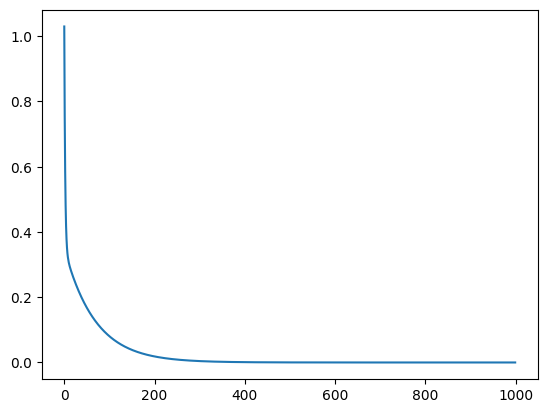

In [ ]:
import matplotlib.pyplot as plt
plt.plot(error_list)
plt.show()

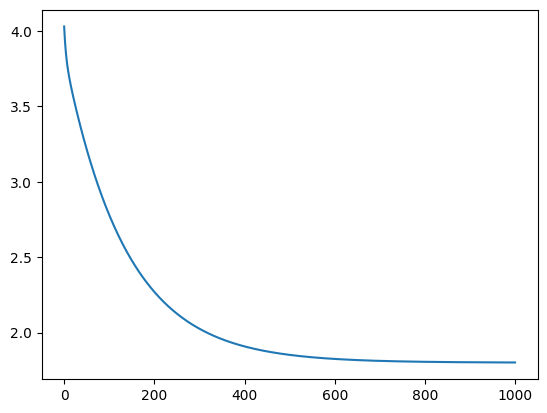

In [ ]:
plt.plot(weight_list)
plt.show()

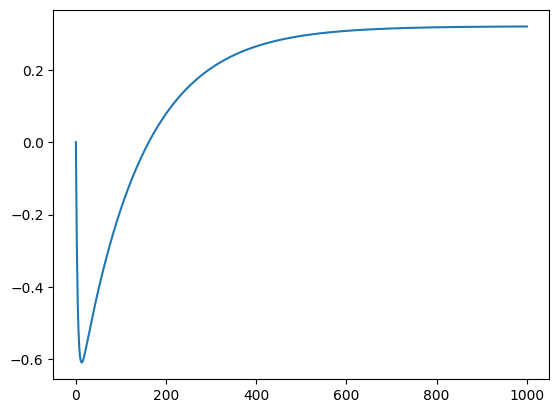

In [ ]:
plt.plot(bias_list)
plt.show()